In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
%cd /content/drive/MyDrive/apple_case_study

/content/drive/MyDrive/apple_case_study


In [3]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

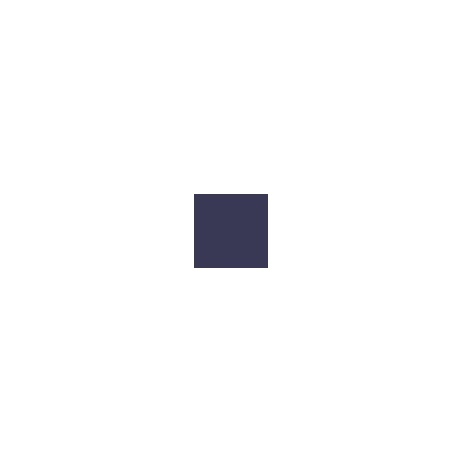

In [4]:
image = cv2.imread('squares/squares/train/a/0.jpg')
cv2_imshow(image)

In [5]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# Threshold the image - segment white background from post it notes
_, thresh = cv2.threshold(gray, 250, 255, cv2.THRESH_BINARY_INV);
# Find the contours
contours, _ = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

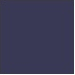

88.9632 62.06648888888889 62.474133333333334
False
False
False


In [9]:
for contour in contours:
    area = cv2.contourArea(contour)
    # If the contour is not really small, or really big
    h,w = image.shape[0], image.shape[1]
    # Get the four corners of the contour
    x,y,w,h = cv2.boundingRect(contour)
    roi = image[y:y+h, x:x+h]
    cv2_imshow(roi)

    mean_blue = np.mean(roi[:,:,0])
    mean_green = np.mean(roi[:,:,1])
    mean_red = np.mean(roi[:,:,2]) 


In [12]:
import pandas as pd

In [13]:
train_csv_filename = "train.csv"
val_csv_filename = "val.csv"

In [14]:
train_df = pd.read_csv (train_csv_filename)
val_df = pd.read_csv (val_csv_filename)

In [15]:
print(train_df.head)

<bound method NDFrame.head of              Red        Blue       Green  Class
0      62.474133   62.066489   88.963200      1
1      27.040089   28.030702   57.777470      1
2      67.966000   67.202800   94.226400      1
3     248.000000  248.000000  248.000000      1
4      49.999923   49.999923   49.999923      1
...          ...         ...         ...    ...
1495  178.059556  179.040000  183.859911      3
1496  153.332400  153.246800  202.197600      3
1497  230.763642  229.967949  184.553583      3
1498  182.015721  181.077064  194.905575      3
1499  170.165713  171.101457  188.865505      3

[1500 rows x 4 columns]>


In [17]:
X_train = train_df.drop('Class', axis=1)
y_train = train_df['Class']
X_val = val_df.drop('Class', axis=1)
y_val = val_df['Class']

In [18]:
from sklearn.svm import SVC
linear_svclassifier = SVC(kernel='linear')
linear_svclassifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [19]:
y_pred = linear_svclassifier.predict(X_val)

In [20]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_val,y_pred))
print(classification_report(y_val,y_pred))

[[340   0 160]
 [288  39 173]
 [  0  34 466]]
              precision    recall  f1-score   support

           1       0.54      0.68      0.60       500
           2       0.53      0.08      0.14       500
           3       0.58      0.93      0.72       500

    accuracy                           0.56      1500
   macro avg       0.55      0.56      0.49      1500
weighted avg       0.55      0.56      0.49      1500



In [ ]:
from sklearn.svm import SVC
poly_svclassifier = SVC(kernel='poly', degree=8)
poly_svclassifier.fit(X_train, y_train)

KeyboardInterrupt: ignored

In [ ]:
y_pred = poly_svclassifier.predict(X_val)

In [23]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

[[339 161   0]
 [ 51 341 108]
 [  0 233 267]]
              precision    recall  f1-score   support

           1       0.87      0.68      0.76       500
           2       0.46      0.68      0.55       500
           3       0.71      0.53      0.61       500

    accuracy                           0.63      1500
   macro avg       0.68      0.63      0.64      1500
weighted avg       0.68      0.63      0.64      1500

